## **Attention Map Testing**
We produced attention maps for the best-performing model, as part of the evaluation before deploying it in a simulated SAR operation, examples of these are included in the paper to show that the model isn't just a leg detector :)
We used the YOLOv8 Cam framework: https://github.com/rigvedrs/YOLO-V8-CAM


again google drive is used to load data and thus this code would have to be changed if you wish to run it

#Imports

In [1]:
!pip3 install ultralytics
!pip3 install ttach

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 6.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

#YOLOv8 testing

In [1]:
import ultralytics
from ultralytics import YOLO
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io
import os
plt.rcParams["figure.figsize"] = [3.0, 3.0]


In [2]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')
# Add the path to the directory containing the module
sys.path.append('/content/drive/My Drive/Dissertation/')

print(sys.path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/Dissertation/']


In [3]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [4]:
# we uploaded the pytorch weights of the best YOLOv8-n model to colab
model = YOLO('best_model.pt')

!ls

attention_maps	attention_maps.zip  best_model.pt  drive  sample_data



0: 640x640 2 persons, 771.0ms
Speed: 20.8ms preprocess, 771.0ms inference, 13.1ms postprocess per image at shape (1, 3, 640, 640)
sample num 0


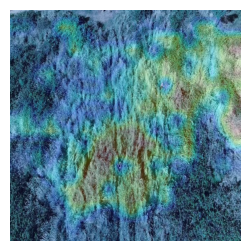

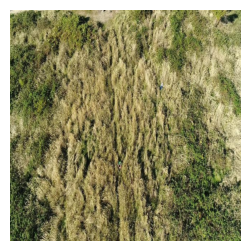


0: 640x640 1 person, 380.7ms
Speed: 2.8ms preprocess, 380.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
sample num 650


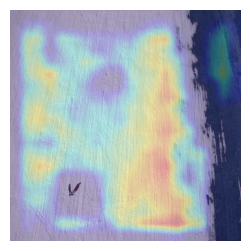

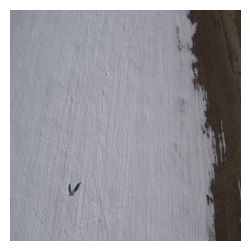


0: 640x640 1 person, 384.4ms
Speed: 17.7ms preprocess, 384.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
sample num 1300


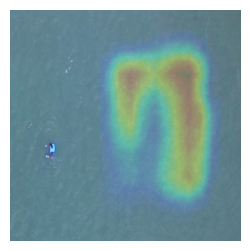

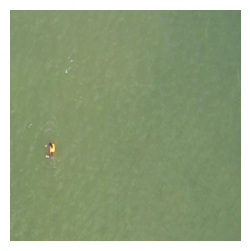

In [5]:
dataset_dir = '/content/drive/My Drive/Dissertation/Datasets/SARDet/full_augmented/test/'

count = 0


for img_name in os.listdir(dataset_dir):
    # Check if the file does NOT end with '.json'
    if not img_name.endswith('.json'):
        if count % 650 == 0:
            path = dataset_dir + img_name
            img = cv2.imread(path)
            rgb_img = img.copy()
            img = np.float32(img) / 255
            target_layers = [model.model.model[-4]]
            cam = EigenCAM(model, target_layers, task='od')
            grayscale_cam = cam(rgb_img)[0, :, :]
            cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True, image_weight=0.8)
            print("sample num",count)
            # Save the CAM image
            plt.imshow(cam_image)
            plt.axis('off')  # Hide axis
            plt.savefig(f'attention_maps/CAM_{count}_map', bbox_inches='tight', pad_inches=0)
            plt.show()

            # Save the original image
            plt.imshow(cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
            plt.axis('off')  # Hide axis
            plt.savefig(f'attention_maps/CAM_{count}_og', bbox_inches='tight', pad_inches=0)
            plt.show()
        count += 1

# I output a few images in the notebook to show it works - run the whole thing to create a folder of heatmaps

In [9]:
import os
import shutil
from google.colab import files

# Specify the directory you want to zip
folder_path = 'attention_maps'

# Define the name of the zip file you want to create
zip_file = 'attention_maps.zip'

# Create a zip file of the folder
shutil.make_archive(zip_file.replace('.zip', ''), 'zip', folder_path)

# Download the zip file
files.download(zip_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>